In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [116]:
RANDOM_SEED = 42

In [117]:
food_ing_df = pd.read_excel('dataset/food/FNDDSIngred.xlsx')
nutrient_df = pd.read_excel('dataset/food/NutDesc.xlsx')
food_nut_df = pd.read_excel('dataset/food/FNDDSNutVal.xlsx')
main_food_df = pd.read_excel('dataset/food/MainFoodDesc.xlsx')


In [118]:
food_ing_df.head()

,Food code,Seq num,Ingredient code,Ingredient description,Amount,Measure,Portion code,Retention code,Ingredient weight,Start date,End date
0,11000000,1,1107,"Milk, human, mature, fluid (For Reference Only)",100.0,GM,0,0,100.0,2019-01-01,2020-12-31
1,11100000,1,1077,"Milk, whole, 3.25% milkfat, with added vitamin D",40.0,GM,0,0,40.0,2019-01-01,2020-12-31
2,11100000,2,1079,"Milk, reduced fat, fluid, 2% milkfat, with add...",38.0,GM,0,0,38.0,2019-01-01,2020-12-31
3,11100000,3,1082,"Milk, lowfat, fluid, 1% milkfat, with added vi...",14.0,GM,0,0,14.0,2019-01-01,2020-12-31
4,11100000,4,1085,"Milk, nonfat, fluid, with added vitamin A and ...",8.0,GM,0,0,8.0,2019-01-01,2020-12-31


In [119]:
nutrient_df.head()

,Nutrient code,Nutrient description,Tagname,Unit,Decimals
0,203,Protein,PROCNT,g,2
1,204,Total Fat,FAT,g,2
2,205,Carbohydrate,CHOCDF,g,2
3,208,Energy,ENERC_KCAL,kcal,0
4,221,Alcohol,ALC,g,1


In [120]:
main_food_df.head()

,Food code,Main food description,WWEIA Category number,WWEIA Category description,Start date,End date
0,11000000,"Milk, human",9602,Human milk,2019-01-01,2020-12-31
1,11100000,"Milk, NFS",1004,"Milk, reduced fat",2019-01-01,2020-12-31
2,11111000,"Milk, whole",1002,"Milk, whole",2019-01-01,2020-12-31
3,11112110,"Milk, reduced fat (2%)",1004,"Milk, reduced fat",2019-01-01,2020-12-31
4,11112210,"Milk, low fat (1%)",1006,"Milk, lowfat",2019-01-01,2020-12-31


In [121]:
user_df = pd.read_sas('dataset/user/BodyMeasures.XPT')
user_df.columns = [
    "seqn",
    "status",
    "weight",
    "weight_comment",
    "recumbent_length",
    "recumbent_length_comment",
    "head_circumference",
    "head_circumference_comment",
    "height",
    "height_comment",
    "bmi",
    "bmi_category",
    "upper_leg_length",
    "upper_leg_length_comment",
    "upper_arm_length",
    "upper_arm_length_comment",
    "arm_circumference",
    "arm_circumference_comment",
    "waist_circumference",
    "waist_circumference_comment",
    "hip_circumference",
    "hip_circumference_comment",
]
user_df = user_df.drop(['status', 'recumbent_length', 'bmi_category', 'head_circumference', 'weight_comment', 'recumbent_length_comment', 'head_circumference_comment', 'height_comment', 'upper_leg_length_comment', 'upper_arm_length_comment', 'arm_circumference_comment', 'waist_circumference_comment', 'hip_circumference_comment'], axis=1)
user_df = user_df.fillna(user_df.mean())
user_df.head()

,seqn,weight,height,bmi,upper_leg_length,upper_arm_length,arm_circumference,waist_circumference,hip_circumference
0,109263.0,65.42638,156.490188,26.656847,38.745666,33.802728,29.320009,89.669135,105.696877
1,109264.0,42.20000,154.700000,17.600000,36.300000,33.800000,22.700000,63.800000,85.000000
2,109265.0,12.00000,89.300000,15.000000,38.745666,18.600000,14.800000,41.200000,105.696877
3,109266.0,97.10000,160.200000,37.800000,40.800000,34.700000,35.800000,117.900000,126.100000
4,109269.0,13.60000,156.490188,26.656847,38.745666,33.802728,29.320009,89.669135,105.696877


In [122]:
user_bp_df = pd.read_sas('dataset/user/BloodPressure.XPT')

user_bp_df.columns = [
    "seqn",
    "selected_arm",
    "coded_cuff_size",
    "systolic_1",
    "diastolic_1",
    "systolic_2",
    "diastolic_2",
    "systolic_3",
    "diastolic_3",
    "pulse_1",
    "pulse_2",
    "pulse_3",
]
user_bp_df.head()

,seqn,selected_arm,coded_cuff_size,systolic_1,diastolic_1,systolic_2,diastolic_2,systolic_3,diastolic_3,pulse_1,pulse_2,pulse_3
0,109264.0,b'R',3.0,109.0,67.0,109.0,68.0,106.0,66.0,94.0,95.0,91.0
1,109266.0,b'R',4.0,99.0,56.0,99.0,55.0,99.0,52.0,68.0,66.0,66.0
2,109270.0,b'R',3.0,123.0,73.0,124.0,77.0,127.0,70.0,95.0,98.0,93.0
3,109271.0,b'R',4.0,102.0,65.0,108.0,68.0,111.0,68.0,73.0,71.0,70.0
4,109273.0,b'R',3.0,116.0,68.0,110.0,66.0,115.0,68.0,71.0,70.0,70.0


In [123]:
user_bp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11656 entries, 0 to 11655
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   seqn             11656 non-null  float64
 1   selected_arm     11656 non-null  object 
 2   coded_cuff_size  10373 non-null  float64
 3   systolic_1       10352 non-null  float64
 4   diastolic_1      10352 non-null  float64
 5   systolic_2       10327 non-null  float64
 6   diastolic_2      10327 non-null  float64
 7   systolic_3       10286 non-null  float64
 8   diastolic_3      10286 non-null  float64
 9   pulse_1          9471 non-null   float64
 10  pulse_2          9448 non-null   float64
 11  pulse_3          9412 non-null   float64
dtypes: float64(11), object(1)
memory usage: 1.1+ MB


In [124]:
numeric_cols = ["coded_cuff_size", "systolic_1", "diastolic_1", "systolic_2", "diastolic_2", "systolic_3", "diastolic_3", "pulse_1", "pulse_2", "pulse_3"]
user_bp_df[numeric_cols] = user_bp_df[numeric_cols].fillna(user_bp_df[numeric_cols].mean())

In [125]:
user_bp_df['systolic'] = user_bp_df[['systolic_1', 'systolic_2', 'systolic_3']].mean(axis=1)
user_bp_df['diastolic'] = user_bp_df[['diastolic_1', 'diastolic_2', 'diastolic_3']].mean(axis=1)
user_bp_df['pulse'] = user_bp_df[['pulse_1', 'pulse_2', 'pulse_3']].mean(axis=1)

user_bp_df = user_bp_df.drop(['coded_cuff_size', 'systolic_1', 'systolic_2', 'systolic_3', 'diastolic_1', 'diastolic_2', 'diastolic_3', 'pulse_1', 'pulse_2', 'pulse_3', 'selected_arm'], axis=1)
user_bp_df.head()

,seqn,systolic,diastolic,pulse
0,109264.0,108.000000,67.000000,93.333333
1,109266.0,99.000000,54.333333,66.666667
2,109270.0,124.666667,73.333333,95.333333
3,109271.0,107.000000,67.000000,71.333333
4,109273.0,113.666667,67.333333,70.333333


<Axes: xlabel='systolic', ylabel='Count'>

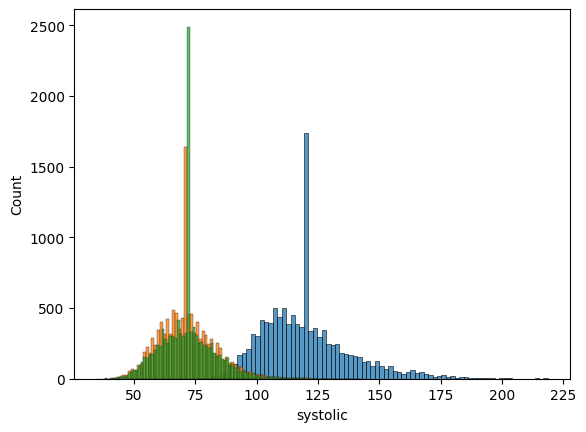

In [126]:
sns.histplot(user_bp_df['systolic'])
sns.histplot(user_bp_df['diastolic'])
sns.histplot(user_bp_df['pulse'])

In [127]:
user = pd.merge(user_df, user_bp_df, on='seqn')
user.head()

,seqn,weight,height,bmi,upper_leg_length,upper_arm_length,arm_circumference,waist_circumference,hip_circumference,systolic,diastolic,pulse
0,109264.0,42.2,154.7,17.6,36.3,33.8,22.7,63.8,85.000000,108.000000,67.000000,93.333333
1,109266.0,97.1,160.2,37.8,40.8,34.7,35.8,117.9,126.100000,99.000000,54.333333,66.666667
2,109270.0,75.3,156.0,30.9,42.6,36.1,31.0,91.4,105.696877,124.666667,73.333333,95.333333
3,109271.0,98.8,182.3,29.7,40.1,42.0,38.2,120.4,108.200000,107.000000,67.000000,71.333333
4,109273.0,74.3,184.2,21.9,41.0,41.1,30.2,86.8,94.500000,113.666667,67.333333,70.333333


In [128]:
user_food_pref = pd.read_sas('dataset/user/IndividualFoods.XPT')
user_food_pref.head()

,SEQN,WTDRD1PP,WTDR2DPP,DR1ILINE,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,...,DR1IM181,DR1IM201,DR1IM221,DR1IP182,DR1IP183,DR1IP184,DR1IP204,DR1IP205,DR1IP225,DR1IP226
0,109263.0,7619.483586,17808.067666,12.0,1.0,14.0,2.0,2.0,4.0,6.0,...,1.941,3.600000e-02,5.397605e-79,0.838,0.088,5.397605e-79,1.200000e-02,5.397605e-79,5.397605e-79,5.397605e-79
1,109263.0,7619.483586,17808.067666,10.0,1.0,14.0,2.0,2.0,4.0,6.0,...,1.229,1.300000e-02,5.397605e-79,0.520,0.013,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
2,109263.0,7619.483586,17808.067666,4.0,1.0,14.0,2.0,2.0,4.0,6.0,...,5.683,8.800000e-02,5.000000e-03,3.482,0.421,5.000000e-03,2.900000e-02,1.000000e-02,1.000000e-02,5.397605e-79
3,109263.0,7619.483586,17808.067666,9.0,1.0,14.0,2.0,2.0,4.0,6.0,...,0.010,5.397605e-79,5.397605e-79,0.069,0.015,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
4,109263.0,7619.483586,17808.067666,13.0,1.0,14.0,2.0,2.0,4.0,6.0,...,2.382,1.400000e-02,5.397605e-79,1.209,0.114,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79


In [129]:
user_food_pref.columns = [
    "seqn",
    "dietary_day_one_sample_weight",
    "dietary_day_two_sample_weight",
    "food_component_number",
    "dietary_recall_status",
    "interviewer_id_code",
    "breast_fed_infant",
    "number_of_days_of_intake",
    "number_of_days_bn_intake_and_interview",
    "intake_day_of_week",
    "respondent_language",
    "combination_food_number",
    "combination_food_type",
    "time_of_eating_occasion",
    "name_of_eating_occasion",
    "source_of_food",
    "location_of_food_home",
    "usda_food_code",
    "grams",
    "energy_kcal",
    "protein_gm",
    "carbohydrate_gm",
    "total_sugar_gm",
    "dietary_fiber_gm",
    "total_fat_gm",
    "total_saturated_fatty_acids_gm",
    "total_monounsaturated_fatty_acids_gm",
    "total_polyunsaturated_fatty_acids_gm",
    "cholesterol_mg",
    "vitamin_e_mg",
    "added_alpha_tocopherol_mg",
    "retinol_mcg",
    "vitamin_a_rae_mcg",
    "alpha_carotene_mcg",
    "beta_carotene_mcg",
    "beta_cryptoxanthin_mcg",
    "lycopene_mcg",
    "lutein_zeaxanthin_mcg",
    "thiamin_mg",
    "riboflavin_mg",
    "niacin_mg",
    "vitamin_b6_mg",
    "total_folate_mcg",
    "folic_acid_mcg",
    "food_folate_mcg",
    "dietary_folate_equivalents_mcg",
    "total_choline_mg",
    "vitamin_b12_mcg",
    "added_vitamin_b12_mcg",
    "vitamin_c_mg",    
    "vitamin_d_d2_d3_mcg",
    "vitamin_k_mcg",
    "calcium_mg",
    "phosphorus_mg",
    "magnesium_mg",
    "iron_mg",
    "zinc_mg",
    "copper_mg",
    "sodium_mcg",
    "potassium_mg",
    "selenium_mcg",
    "caffeine_mg",
    "theobromine_mg",
    "alcohol_gm",
    "moisture_gm",
    "sfa_butanoic_gm",
    "sfa_hexanoic_gm",
    "sfa_octanoic_gm",
    "sfa_decanoic_gm",
    "sfa_dodecanoic_gm",
    "sfa_tetradecanoic_gm",
    "sfa_hexadecanoic_gm",
    "sfa_octadecanoic_gm",        
    "mfa_hexadecenoic_gm",
    "mfa_octadecenoic_gm",
    "mfa_eicosenoic_gm",
    "mfa_docosenoic_gm",
    "pfa_octadecadienoic_gm",
    "pfa_octadecatrienoic_gm",
    "pfa_octadecatetraenoic_gm",
    "pfa_eicosadienoic_gm",
    "pfa_eicosatrienoic_gm",
    "pfa_docosapentaenoic_gm",
    "pfa_docosahexaenoic_gm",
]

In [130]:
user_food_pref['combination_food_type']

0         5.397605e-79
1         5.397605e-79
2         5.397605e-79
3         5.397605e-79
4         5.397605e-79
              ...     
183905    5.397605e-79
183906    5.397605e-79
183907    5.397605e-79
183908    5.397605e-79
183909    5.397605e-79
Name: combination_food_type, Length: 183910, dtype: float64

In [131]:
user_food_pref.drop(["dietary_day_one_sample_weight", "dietary_day_two_sample_weight", "food_component_number","dietary_recall_status", "interviewer_id_code", "respondent_language", "combination_food_number","number_of_days_bn_intake_and_interview","number_of_days_of_intake", "time_of_eating_occasion", "combination_food_type"], inplace=True, axis=1)

In [132]:
user_food_pref.head()

,seqn,breast_fed_infant,intake_day_of_week,name_of_eating_occasion,source_of_food,location_of_food_home,usda_food_code,grams,energy_kcal,protein_gm,...,mfa_octadecenoic_gm,mfa_eicosenoic_gm,mfa_docosenoic_gm,pfa_octadecadienoic_gm,pfa_octadecatrienoic_gm,pfa_octadecatetraenoic_gm,pfa_eicosadienoic_gm,pfa_eicosatrienoic_gm,pfa_docosapentaenoic_gm,pfa_docosahexaenoic_gm
0,109263.0,2.0,6.0,3.0,1.0,1.0,28320300.0,199.5,114.0,12.11,...,1.941,3.600000e-02,5.397605e-79,0.838,0.088,5.397605e-79,1.200000e-02,5.397605e-79,5.397605e-79,5.397605e-79
1,109263.0,2.0,6.0,6.0,8.0,1.0,91746110.0,20.0,101.0,2.20,...,1.229,1.300000e-02,5.397605e-79,0.520,0.013,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
2,109263.0,2.0,6.0,2.0,8.0,2.0,58106210.0,238.0,633.0,27.11,...,5.683,8.800000e-02,5.000000e-03,3.482,0.421,5.000000e-03,2.900000e-02,1.000000e-02,1.000000e-02,5.397605e-79
3,109263.0,2.0,6.0,6.0,1.0,1.0,64104010.0,209.0,99.0,0.19,...,0.010,5.397605e-79,5.397605e-79,0.069,0.015,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
4,109263.0,2.0,6.0,3.0,1.0,1.0,11710801.0,124.0,123.0,3.55,...,2.382,1.400000e-02,5.397605e-79,1.209,0.114,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79


In [133]:
user_food_pref['usda_food_code'] = user_food_pref['usda_food_code'].apply(int)
user_food_pref['seqn'] = user_food_pref['seqn'].apply(int)

In [134]:
merged = pd.merge(user_food_pref, main_food_df, left_on='usda_food_code', right_on='Food code')
merged.head()

,seqn,breast_fed_infant,intake_day_of_week,name_of_eating_occasion,source_of_food,location_of_food_home,usda_food_code,grams,energy_kcal,protein_gm,...,pfa_eicosadienoic_gm,pfa_eicosatrienoic_gm,pfa_docosapentaenoic_gm,pfa_docosahexaenoic_gm,Food code,Main food description,WWEIA Category number,WWEIA Category description,Start date,End date
0,109263,2.0,6.0,3.0,1.0,1.0,28320300,199.50,114.0,12.11,...,0.012,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
1,112171,2.0,7.0,3.0,19.0,1.0,28320300,299.25,172.0,18.08,...,0.018,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
2,112586,2.0,7.0,2.0,16.0,1.0,28320300,199.51,114.0,12.11,...,0.012,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
3,112670,2.0,1.0,3.0,1.0,1.0,28320300,128.25,74.0,7.75,...,0.008,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
4,112670,2.0,1.0,1.0,1.0,1.0,28320300,171.00,98.0,10.33,...,0.010,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31


In [135]:
source_of_food = {1: 'Store - grocery/supermarket', 2: 'Restaurant with waiter/waitress', 3: 'Restaurant fast food/pizza', 
                  4: 'Bar/tavern/lounge', 5: 'Restaurant no additional information', 6: 'Cafeteria NOT in a K-12 school', 
                  7: 'Cafeteria in a K-12 school', 8: 'Child/Adult care center', 9: 'Child/Adult home care', 
                  10: 'Soup kitchen/shelter/food pantry', 11: 'Meals on Wheels', 12: 'Community food program - other',
                    13: 'Community program no additional information', 14: 'Vending machine', 15: 'Common coffee pot or snack tray', 
                    16: 'From someone else/gift', 17: 'Mail order purchase', 18: 'Residential dining facility', 
                    19: 'Grown or caught by you or someone you know', 20: 'Fish caught by you or someone you know', 
                    24: 'Sport, recreation, or entertainment facility', 25: 'Street vendor, vending truck', 26: 'Fundraiser sales', 
                    27: 'Store - convenience type', 28: 'Store - no additional info', 91: 'Other, specify', 99: "Don't know"}

In [136]:
name_of_occasion = {1: 'Breakfast', 2: 'Lunch', 3: 'Dinner', 4: 'Supper', 5: 'Brunch', 6:'Snack', 7:'Drink', 8:'Infant feeding', 9:'Extended consumption', 
                    10:'Desayano', 11:'Almuerzo',12:'Comida', 13:'Merienda', 14:'Cena', 15:'Entre comida', 16:'Botana', 17:'Bocadillo', 
                    18:'Tentempie', 19:'Bebida',91:'Other', 99:"Don't know"}

In [137]:
days = ["", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday"]

In [138]:
combination_food_type = {
    0 :"Non-combination food",
    1 : "Beverage w/ additions",
    2 : "Cereal w/ additions",
    3 : "Bread/baked products w/ additions",
    4 : "Salad",
    5 : "Sandwiches",
    6 : "Soup",
    7 : "Frozen meals",
    8 : "Ice cream/frozen yogurt w/ additions",
    9 : "Dried beans and vegetable w/ additions",
    10 : "Fruit w/ additions",
    11 : "Tortilla products",
    12 : "Meat, poultry, fish",
    13 : "Lunchables",
    14 : "Chips w/ additions",
    90 : "Other mixtures"
}

In [139]:
location_of_food_home = {1: "Yes", 2: "No", 7: "Refused", 9: "Don't know"}

In [140]:
merged.columns

Index(['seqn', 'breast_fed_infant', 'intake_day_of_week',
       'name_of_eating_occasion', 'source_of_food', 'location_of_food_home',
       'usda_food_code', 'grams', 'energy_kcal', 'protein_gm',
       'carbohydrate_gm', 'total_sugar_gm', 'dietary_fiber_gm', 'total_fat_gm',
       'total_saturated_fatty_acids_gm',
       'total_monounsaturated_fatty_acids_gm',
       'total_polyunsaturated_fatty_acids_gm', 'cholesterol_mg',
       'vitamin_e_mg', 'added_alpha_tocopherol_mg', 'retinol_mcg',
       'vitamin_a_rae_mcg', 'alpha_carotene_mcg', 'beta_carotene_mcg',
       'beta_cryptoxanthin_mcg', 'lycopene_mcg', 'lutein_zeaxanthin_mcg',
       'thiamin_mg', 'riboflavin_mg', 'niacin_mg', 'vitamin_b6_mg',
       'total_folate_mcg', 'folic_acid_mcg', 'food_folate_mcg',
       'dietary_folate_equivalents_mcg', 'total_choline_mg', 'vitamin_b12_mcg',
       'added_vitamin_b12_mcg', 'vitamin_c_mg', 'vitamin_d_d2_d3_mcg',
       'vitamin_k_mcg', 'calcium_mg', 'phosphorus_mg', 'magnesium_mg',
   

In [141]:
merged.head()

,seqn,breast_fed_infant,intake_day_of_week,name_of_eating_occasion,source_of_food,location_of_food_home,usda_food_code,grams,energy_kcal,protein_gm,...,pfa_eicosadienoic_gm,pfa_eicosatrienoic_gm,pfa_docosapentaenoic_gm,pfa_docosahexaenoic_gm,Food code,Main food description,WWEIA Category number,WWEIA Category description,Start date,End date
0,109263,2.0,6.0,3.0,1.0,1.0,28320300,199.50,114.0,12.11,...,0.012,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
1,112171,2.0,7.0,3.0,19.0,1.0,28320300,299.25,172.0,18.08,...,0.018,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
2,112586,2.0,7.0,2.0,16.0,1.0,28320300,199.51,114.0,12.11,...,0.012,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
3,112670,2.0,1.0,3.0,1.0,1.0,28320300,128.25,74.0,7.75,...,0.008,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
4,112670,2.0,1.0,1.0,1.0,1.0,28320300,171.00,98.0,10.33,...,0.010,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31


In [142]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177881 entries, 0 to 177880
Data columns (total 79 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   seqn                                  177881 non-null  int64         
 1   breast_fed_infant                     177881 non-null  float64       
 2   intake_day_of_week                    177881 non-null  float64       
 3   name_of_eating_occasion               177881 non-null  float64       
 4   source_of_food                        165715 non-null  float64       
 5   location_of_food_home                 176477 non-null  float64       
 6   usda_food_code                        177881 non-null  int64         
 7   grams                                 176477 non-null  float64       
 8   energy_kcal                           176477 non-null  float64       
 9   protein_gm                            176477 non-null  floa

In [143]:
user_data = merged.dropna().drop(["breast_fed_infant"], axis=1)

In [144]:
user_data.head()

,seqn,intake_day_of_week,name_of_eating_occasion,source_of_food,location_of_food_home,usda_food_code,grams,energy_kcal,protein_gm,carbohydrate_gm,...,pfa_eicosadienoic_gm,pfa_eicosatrienoic_gm,pfa_docosapentaenoic_gm,pfa_docosahexaenoic_gm,Food code,Main food description,WWEIA Category number,WWEIA Category description,Start date,End date
0,109263,6.0,3.0,1.0,1.0,28320300,199.50,114.0,12.11,5.07,...,0.012,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
1,112171,7.0,3.0,19.0,1.0,28320300,299.25,172.0,18.08,8.32,...,0.018,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
2,112586,7.0,2.0,16.0,1.0,28320300,199.51,114.0,12.11,5.07,...,0.012,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
3,112670,1.0,3.0,1.0,1.0,28320300,128.25,74.0,7.75,3.56,...,0.008,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
4,112670,1.0,1.0,1.0,1.0,28320300,171.00,98.0,10.33,4.75,...,0.010,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31


In [145]:
df = pd.DataFrame(user_data)


In [146]:
df['intake_day_of_week'] = user_data['intake_day_of_week'].apply(lambda x: days[int(x)])
df['name_of_eating_occasion'] = user_data['name_of_eating_occasion'].apply(lambda x: name_of_occasion[int(x)])
df['source_of_food'] = user_data['source_of_food'].apply(lambda x: source_of_food[int(x)])
df['location_of_food_home'] = user_data['location_of_food_home'].apply(lambda x: location_of_food_home[int(x)])

In [147]:
df.head()

,seqn,intake_day_of_week,name_of_eating_occasion,source_of_food,location_of_food_home,usda_food_code,grams,energy_kcal,protein_gm,carbohydrate_gm,...,pfa_eicosadienoic_gm,pfa_eicosatrienoic_gm,pfa_docosapentaenoic_gm,pfa_docosahexaenoic_gm,Food code,Main food description,WWEIA Category number,WWEIA Category description,Start date,End date
0,109263,Friday,Dinner,Store - grocery/supermarket,Yes,28320300,199.50,114.0,12.11,5.07,...,0.012,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
1,112171,Saturday,Dinner,Grown or caught by you or someone you know,Yes,28320300,299.25,172.0,18.08,8.32,...,0.018,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
2,112586,Saturday,Lunch,From someone else/gift,Yes,28320300,199.51,114.0,12.11,5.07,...,0.012,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
3,112670,Sunday,Dinner,Store - grocery/supermarket,Yes,28320300,128.25,74.0,7.75,3.56,...,0.008,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
4,112670,Sunday,Breakfast,Store - grocery/supermarket,Yes,28320300,171.00,98.0,10.33,4.75,...,0.010,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31


In [157]:
# or simply

import preprocessing

preprocessing.load_users_health()

,seqn,weight,height,bmi,upper_leg_length,upper_arm_length,arm_circumference,waist_circumference,hip_circumference,systolic,diastolic,pulse
0,109264.0,42.2,154.7,17.6,36.3,33.8,22.7,63.8,85.000000,108.000000,67.000000,93.333333
1,109266.0,97.1,160.2,37.8,40.8,34.7,35.8,117.9,126.100000,99.000000,54.333333,66.666667
2,109270.0,75.3,156.0,30.9,42.6,36.1,31.0,91.4,105.696877,124.666667,73.333333,95.333333
3,109271.0,98.8,182.3,29.7,40.1,42.0,38.2,120.4,108.200000,107.000000,67.000000,71.333333
4,109273.0,74.3,184.2,21.9,41.0,41.1,30.2,86.8,94.500000,113.666667,67.333333,70.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
11651,124815.0,94.3,178.8,29.5,44.6,37.8,35.7,99.3,105.300000,140.000000,86.666667,56.666667
11652,124817.0,82.8,147.8,37.9,32.8,34.8,39.5,110.0,121.400000,112.000000,67.333333,70.666667
11653,124818.0,108.8,168.7,38.2,45.6,38.6,33.6,114.7,118.000000,103.000000,67.333333,119.000000
11654,124821.0,79.5,176.4,25.5,42.0,39.5,31.4,97.1,99.800000,124.000000,66.666667,60.666667


In [158]:
preprocessing.load_food_pref_dataset()

e:\4th-year\Semester-1\Programming-for-AI\food_recommendation_system\food-recommendation\preprocessing.py:309: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
e:\4th-year\Semester-1\Programming-for-AI\food_recommendation_system\food-recommendation\preprocessing.py:312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  )
e:\4th-year\Semester-1\Programming-for-AI\food_recommendation_system\food-recommendation\preprocessing.py:315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,seqn,intake_day_of_week,name_of_eating_occasion,source_of_food,location_of_food_home,usda_food_code,grams,energy_kcal,protein_gm,carbohydrate_gm,...,pfa_eicosadienoic_gm,pfa_eicosatrienoic_gm,pfa_docosapentaenoic_gm,pfa_docosahexaenoic_gm,Food code,Main food description,WWEIA Category number,WWEIA Category description,Start date,End date
0,109263,Friday,Dinner,Store - grocery/supermarket,Yes,28320300,199.50,114.0,12.11,5.07,...,1.200000e-02,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
1,112171,Saturday,Dinner,Grown or caught by you or someone you know,Yes,28320300,299.25,172.0,18.08,8.32,...,1.800000e-02,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
2,112586,Saturday,Lunch,From someone else/gift,Yes,28320300,199.51,114.0,12.11,5.07,...,1.200000e-02,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
3,112670,Sunday,Dinner,Store - grocery/supermarket,Yes,28320300,128.25,74.0,7.75,3.56,...,8.000000e-03,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
4,112670,Sunday,Breakfast,Store - grocery/supermarket,Yes,28320300,171.00,98.0,10.33,4.75,...,1.000000e-02,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177876,124778,Friday,Dinner,Restaurant with waiter/waitress,No,58109150,123.20,279.0,8.23,32.93,...,9.000000e-03,4.000000e-03,2.000000e-03,5.397605e-79,58109150,"Pizza, cheese and vegetables, gluten-free thic...",3602,Pizza,2019-01-01,2020-12-31
177877,124784,Saturday,Dinner,Store - grocery/supermarket,Yes,72107230,153.13,93.0,4.40,10.52,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,72107230,"Collards, frozen, cooked with oil",6411,Other dark green vegetables,2019-01-01,2020-12-31
177878,124784,Saturday,Lunch,Store - grocery/supermarket,Yes,72107230,153.13,93.0,4.40,10.52,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,72107230,"Collards, frozen, cooked with oil",6411,Other dark green vegetables,2019-01-01,2020-12-31
177879,124807,Saturday,Dinner,Store - grocery/supermarket,Yes,72118211,170.63,63.0,5.06,8.80,...,3.000000e-03,5.397605e-79,5.397605e-79,5.397605e-79,72118211,"Greens, fresh, cooked, no added fat",6411,Other dark green vegetables,2019-01-01,2020-12-31
